In [1]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups

/Users/yujian/Documents/personal-workspace/level-1-python/level1_py310/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# fetch an example dataset from sklearn
docs = fetch_20newsgroups(subset='all')['data']

In [3]:
print(len(docs))

18846


In [4]:
print(docs[0])

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




In [5]:
print(docs[44])

From: gritter@cs.purdue.edu (Carl Gritter)
Subject: NHL ALLTIME SCORING LEADERS
Organization: Purdue University Department of Computer Sciences
Lines: 235
Distribution: world
NNTP-Posting-Host: morgause.cs.purdue.edu


Here are the NHL's alltime leaders in goals and points at the end of
the 1992-3 season. Again, much thanks to Joseph Achkar.

Carl

Notes: An active player is a player that has scored at least one
point the past season.  The points leaders follow the goal leaders.
If you find any mistakes, please send me email.
-------------------------------------------------------------------

All time NHL leading goal scorers (* denotes active player):

  1.  Gordie Howe          Det-Hfd                            801
  2. *Wayne Gretzky        Edm-LA                             765
  3.  Marcel Dionne        Det-LA-NYR                         731
  4.  Phil Esposito        Chi-Bos-NYR                        717
  5.  Bobby Hull           Chi-Wpg-Hfd                        610
  6. *M

In [4]:
model = BERTopic()
topics, probs = model.fit_transform(docs)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

In [5]:
model.get_topic_freq()

,Topic,Count
0,-1,6593
1,0,431
2,1,232
3,2,181
4,3,167
...,...,...
348,355,11
347,351,11
357,356,10
358,357,10


In [11]:
model.get_topic_info()

,Topic,Count,Name
0,-1,6593,-1_the_to_and_of
1,0,431,0_gun_guns_firearms_weapons
2,1,232,1_address_mailing_email_list
3,2,181,2_jesus_bible_scripture_judas
4,3,167,3_atheists_atheism_god_atheist
...,...,...,...
355,354,11,354_visualization_graphics_seminar_lipman
356,355,11,355_mattingly_don_drm6640teslanjitedu_baseman
357,356,10,356_mining_ssf_funds_miners
358,357,10,357_voltage_current_output_supply


In [6]:
model.visualize_hierarchy()

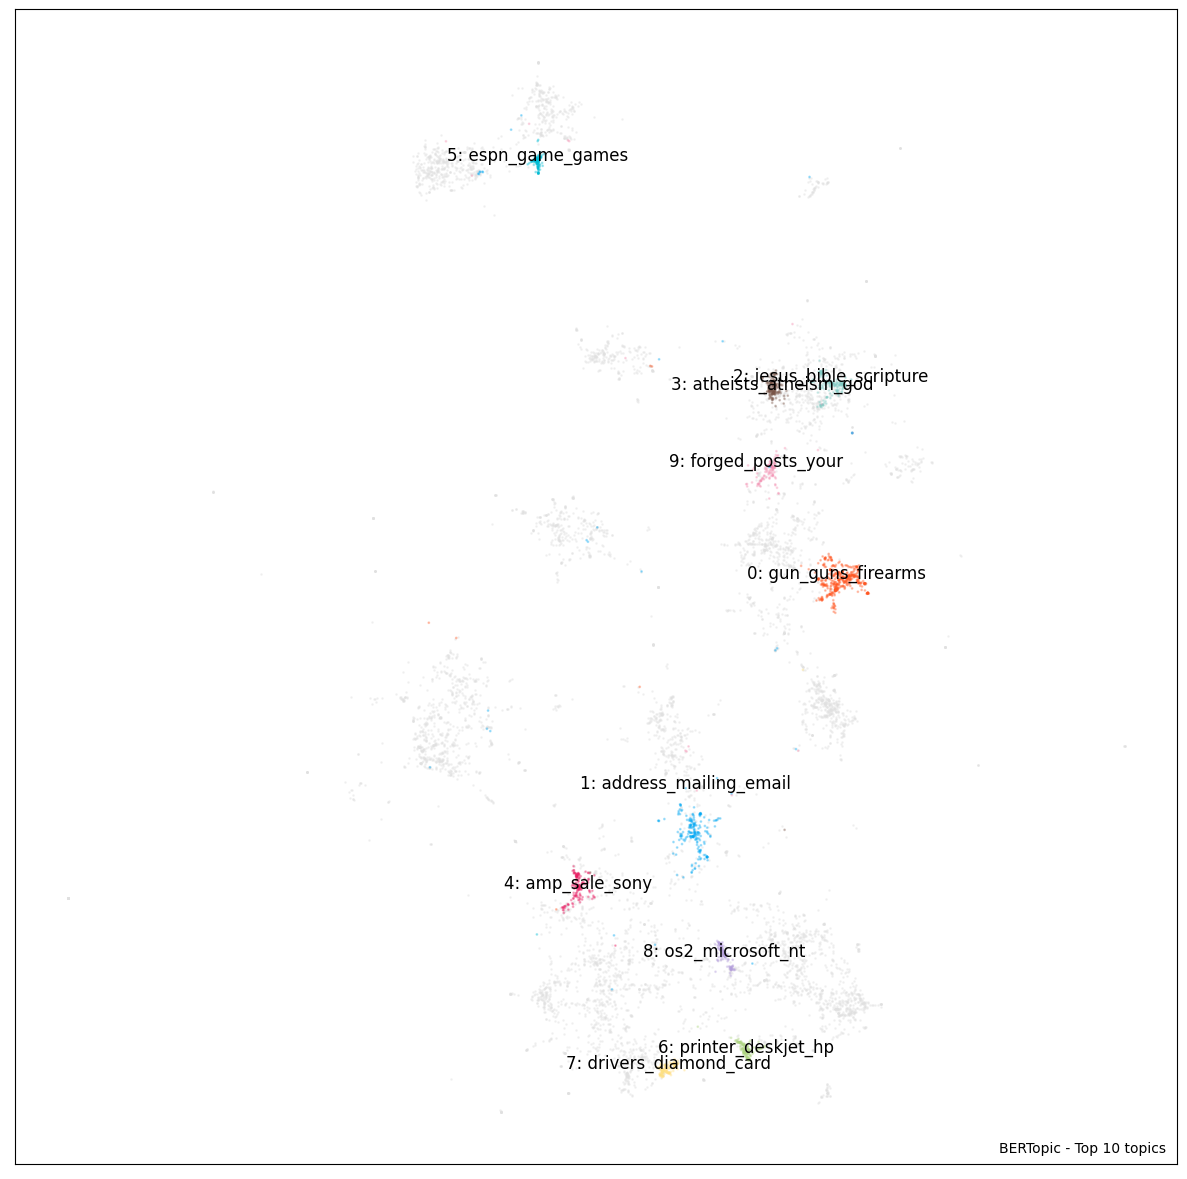

In [8]:
import numpy as np
import pandas as pd
from umap import UMAP
from sklearn.datasets import fetch_20newsgroups

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# Prepare data for plotting
embeddings = model._extract_embeddings(docs, method="document")
umap_model = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit(embeddings)
df = pd.DataFrame(umap_model.embedding_, columns=["x", "y"])
df["topic"] = topics

# Plot parameters
top_n = 10
fontsize = 12

# Slice data
to_plot = df.copy()
to_plot[df.topic >= top_n] = -1
outliers = to_plot.loc[to_plot.topic == -1]
non_outliers = to_plot.loc[to_plot.topic != -1]

# Visualize topics
cmap = matplotlib.colors.ListedColormap(['#FF5722', # Red
                                         '#03A9F4', # Blue
                                         '#4CAF50', # Green
                                         '#80CBC4', # FFEB3B
                                         '#673AB7', # Purple
                                         '#795548', # Brown
                                         '#E91E63', # Pink
                                         '#212121', # Black
                                         '#00BCD4', # Light Blue
                                         '#CDDC39', # Yellow/Red
                                         '#AED581', # Light Green
                                         '#FFE082', # Light Orange
                                         '#BCAAA4', # Light Brown
                                         '#B39DDB', # Light Purple
                                         '#F48FB1', # Light Pink
                                         ])

# Visualize outliers + inliers
fig, ax = plt.subplots(figsize=(15, 15))
scatter_outliers = ax.scatter(outliers['x'], outliers['y'], c="#E0E0E0", s=1, alpha=.3)
scatter = ax.scatter(non_outliers['x'], non_outliers['y'], c=non_outliers['topic'], s=1, alpha=.3, cmap=cmap)

# Add topic names to clusters
centroids = to_plot.groupby("topic").mean().reset_index().iloc[1:]
for row in centroids.iterrows():
    topic = int(row[1].topic)
    text = f"{topic}: " + "_".join([x[0] for x in model.get_topic(topic)[:3]])
    ax.text(row[1].x, row[1].y*1.01, text, fontsize=fontsize, horizontalalignment='center')

ax.text(0.99, 0.01, f"BERTopic - Top {top_n} topics", transform=ax.transAxes, horizontalalignment="right", color="black")
plt.xticks([], [])
plt.yticks([], [])
plt.savefig("BERTopic_Example_Cluster_Plot.png")
plt.show()

In [10]:
len(topics)

18846